<h1>Introduction to Time Series in Python</h1>
<h4>Week 2</h4>


<h2>1.1 Introduction to Python</h2>

<h3>Jupyter Notebooks</h3>

This is your (first?) Jupyter notebook. It consists of Markdown (text) cells and code cells. Cells can be executed by pressing Ctrl Enter. This corresponds to the "Run" button in the notebook menu.

<div class="alert alert-info">
- How can you tell which cell this is? <br>
- Double-click on various Markdown cells and take a look at how the text is formatted here (e.g. headings, breaks, ...) <br>
- Create a new markdown cell below this cell with the heading "My markdown cell" and the text "This is my new markdown cell." (Or a text of your choice) <br>
- Create a code cell under your markdown cell that calculates how much 1234567 times 1234567 is.
</div>

<h3>Installing and importing packages</h3>

Install packages

Import packages

In [4]:
import pandas as pd
import numpy as np

<h3>Read in data set</h3>

In [5]:
ene = pd.read_csv("germany_fossil_renew.csv", sep=";")

In [6]:
ene.head()
#ene.info()
#ene.describe()

Datum  Fossile   Wind  Solar
0  01/2016    37521   9771    702
1  02/2016    32023  10371   1350
2  03/2016    35256   6331   2591
3  04/2016    30078   6235   4129
4  05/2016    27404   6445   5190

In [7]:
ene['Datum'] = pd.to_datetime(ene['Datum'])
ene.head()

c:\temp\ipykernel_8700\2472258369.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ene['Datum'] = pd.to_datetime(ene['Datum'])


Datum  Fossile   Wind  Solar
0 2016-01-01    37521   9771    702
1 2016-02-01    32023  10371   1350
2 2016-03-01    35256   6331   2591
3 2016-04-01    30078   6235   4129
4 2016-05-01    27404   6445   5190

In [8]:
ene.set_index('Datum', inplace=True)
ene.head()

Fossile   Wind  Solar
Datum                            
2016-01-01    37521   9771    702
2016-02-01    32023  10371   1350
2016-03-01    35256   6331   2591
2016-04-01    30078   6235   4129
2016-05-01    27404   6445   5190

<div class="alert alert-info">
- Open a new Jupyter notebook<br>
- Load pandas and numpy<br>
- Load the airline data that you also have in the downloaded folder<br>
- Try to find out a bit about the data<br>
- Format the data set similar to ours here
</div>

<h3>Electricity data</h3>

In [9]:
elec = pd.read_csv("electricity.txt.gz", sep=",", header=None)
elec.head()

0     1      2      3      4       5     6       7      8      9    ...  \
0  14.0  69.0  234.0  415.0  215.0  1056.0  29.0   840.0  226.0  265.0  ...   
1  18.0  92.0  312.0  556.0  292.0  1363.0  29.0  1102.0  271.0  340.0  ...   
2  21.0  96.0  312.0  560.0  272.0  1240.0  29.0  1025.0  270.0  300.0  ...   
3  20.0  92.0  312.0  443.0  213.0   845.0  24.0   833.0  179.0  211.0  ...   
4  22.0  91.0  312.0  346.0  190.0   647.0  16.0   733.0  186.0  179.0  ...   

     311    312      313     314     315   316   317     318    319     320  
0  676.0  372.0  80100.0  4719.0  5002.0  48.0  38.0  1558.0  182.0  2162.0  
1  805.0  452.0  95200.0  4643.0  6617.0  65.0  47.0  2177.0  253.0  2835.0  
2  817.0  430.0  96600.0  4285.0  6571.0  64.0  43.0  2193.0  218.0  2764.0  
3  801.0  291.0  94500.0  4222.0  6365.0  65.0  39.0  1315.0  195.0  2735.0  
4  807.0  279.0  91300.0  4116.0  6298.0  75.0  40.0  1378.0  191.0  2721.0  

[5 rows x 321 columns]

In [10]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Columns: 321 entries, 0 to 320
dtypes: float64(321)
memory usage: 64.4 MB


In [11]:
elec.columns=["Household"+str(i) for i in range(1, 322)]
elec.head()

Household1  Household2  Household3  Household4  Household5  Household6  \
0        14.0        69.0       234.0       415.0       215.0      1056.0   
1        18.0        92.0       312.0       556.0       292.0      1363.0   
2        21.0        96.0       312.0       560.0       272.0      1240.0   
3        20.0        92.0       312.0       443.0       213.0       845.0   
4        22.0        91.0       312.0       346.0       190.0       647.0   

   Household7  Household8  Household9  Household10  ...  Household312  \
0        29.0       840.0       226.0        265.0  ...         676.0   
1        29.0      1102.0       271.0        340.0  ...         805.0   
2        29.0      1025.0       270.0        300.0  ...         817.0   
3        24.0       833.0       179.0        211.0  ...         801.0   
4        16.0       733.0       186.0        179.0  ...         807.0   

   Household313  Household314  Household315  Household316  Household317  \
0         372.0       80100.0        4719.0        5002.0          48.0   
1         452.0       95200.0        4643.0        6617.0          65.0   
2         430.0       96600.0        4285.0        6571.0          64.0   
3         291.0       94500.0        4222.0        6365.0          65.0   
4         279.0       91300.0        4116.0        6298.0          75.0   

   Household318  Household319  Household320  Household321  
0          38.0        1558.0         182.0        2162.0  
1          47.0        2177.0         253.0        2835.0  
2          43.0        2193.0         218.0        2764.0  
3          39.0        1315.0         195.0        2735.0  
4          40.0        1378.0         191.0        2721.0  

[5 rows x 321 columns]

In [12]:
rng = pd.date_range('2012-01-01', periods=26304, freq='h')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [13]:
elec['Time'] = rng
elec.head()

Household1  Household2  Household3  Household4  Household5  Household6  \
0        14.0        69.0       234.0       415.0       215.0      1056.0   
1        18.0        92.0       312.0       556.0       292.0      1363.0   
2        21.0        96.0       312.0       560.0       272.0      1240.0   
3        20.0        92.0       312.0       443.0       213.0       845.0   
4        22.0        91.0       312.0       346.0       190.0       647.0   

   Household7  Household8  Household9  Household10  ...  Household313  \
0        29.0       840.0       226.0        265.0  ...         372.0   
1        29.0      1102.0       271.0        340.0  ...         452.0   
2        29.0      1025.0       270.0        300.0  ...         430.0   
3        24.0       833.0       179.0        211.0  ...         291.0   
4        16.0       733.0       186.0        179.0  ...         279.0   

   Household314  Household315  Household316  Household317  Household318  \
0       80100.0        4719.0        5002.0          48.0          38.0   
1       95200.0        4643.0        6617.0          65.0          47.0   
2       96600.0        4285.0        6571.0          64.0          43.0   
3       94500.0        4222.0        6365.0          65.0          39.0   
4       91300.0        4116.0        6298.0          75.0          40.0   

   Household319  Household320  Household321                Time  
0        1558.0         182.0        2162.0 2012-01-01 00:00:00  
1        2177.0         253.0        2835.0 2012-01-01 01:00:00  
2        2193.0         218.0        2764.0 2012-01-01 02:00:00  
3        1315.0         195.0        2735.0 2012-01-01 03:00:00  
4        1378.0         191.0        2721.0 2012-01-01 04:00:00  

[5 rows x 322 columns]

In [14]:
elec.set_index('Time', inplace=True)
elec.head()

Household1  Household2  Household3  Household4  \
Time                                                                  
2012-01-01 00:00:00        14.0        69.0       234.0       415.0   
2012-01-01 01:00:00        18.0        92.0       312.0       556.0   
2012-01-01 02:00:00        21.0        96.0       312.0       560.0   
2012-01-01 03:00:00        20.0        92.0       312.0       443.0   
2012-01-01 04:00:00        22.0        91.0       312.0       346.0   

                     Household5  Household6  Household7  Household8  \
Time                                                                  
2012-01-01 00:00:00       215.0      1056.0        29.0       840.0   
2012-01-01 01:00:00       292.0      1363.0        29.0      1102.0   
2012-01-01 02:00:00       272.0      1240.0        29.0      1025.0   
2012-01-01 03:00:00       213.0       845.0        24.0       833.0   
2012-01-01 04:00:00       190.0       647.0        16.0       733.0   

                     Household9  Household10  ...  Household312  Household313  \
Time                                          ...                               
2012-01-01 00:00:00       226.0        265.0  ...         676.0         372.0   
2012-01-01 01:00:00       271.0        340.0  ...         805.0         452.0   
2012-01-01 02:00:00       270.0        300.0  ...         817.0         430.0   
2012-01-01 03:00:00       179.0        211.0  ...         801.0         291.0   
2012-01-01 04:00:00       186.0        179.0  ...         807.0         279.0   

                     Household314  Household315  Household316  Household317  \
Time                                                                          
2012-01-01 00:00:00       80100.0        4719.0        5002.0          48.0   
2012-01-01 01:00:00       95200.0        4643.0        6617.0          65.0   
2012-01-01 02:00:00       96600.0        4285.0        6571.0          64.0   
2012-01-01 03:00:00       94500.0        4222.0        6365.0          65.0   
2012-01-01 04:00:00       91300.0        4116.0        6298.0          75.0   

                     Household318  Household319  Household320  Household321  
Time                                                                         
2012-01-01 00:00:00          38.0        1558.0         182.0        2162.0  
2012-01-01 01:00:00          47.0        2177.0         253.0        2835.0  
2012-01-01 02:00:00          43.0        2193.0         218.0        2764.0  
2012-01-01 03:00:00          39.0        1315.0         195.0        2735.0  
2012-01-01 04:00:00          40.0        1378.0         191.0        2721.0  

[5 rows x 321 columns]

In [15]:
elec_s = elec.loc["2012-06-04 02:00:00":"2012-06-05 21:00:00",'Household4']
elec_s.head()

Time
2012-06-04 02:00:00    272.0
2012-06-04 03:00:00    262.0
2012-06-04 04:00:00    255.0
2012-06-04 05:00:00    241.0
2012-06-04 06:00:00    203.0
Name: Household4, dtype: float64

<h3>Save dataset</h3>

In [20]:
HH = 'Household8'
em = pd.DataFrame(elec.loc["2012-05-01":"2012-05-31",HH])
em.head()

Household8
Time                           
2012-05-01 00:00:00       834.0
2012-05-01 01:00:00       824.0
2012-05-01 02:00:00       681.0
2012-05-01 03:00:00       530.0
2012-05-01 04:00:00       672.0

In [21]:
em = em.reset_index(level=0)
em.columns = ['Time','Electricity']
em.head()

Time  Electricity
0 2012-05-01 00:00:00        834.0
1 2012-05-01 01:00:00        824.0
2 2012-05-01 02:00:00        681.0
3 2012-05-01 03:00:00        530.0
4 2012-05-01 04:00:00        672.0

In [22]:
em.to_csv('em_HH8_2012_05.csv')

In [23]:
em2 = pd.read_csv("em_HH8_2012_05.csv", index_col=0)
em2['Time'] = pd.to_datetime(em2['Time'])
em2.head()

Time  Electricity
0 2012-05-01 00:00:00        834.0
1 2012-05-01 01:00:00        824.0
2 2012-05-01 02:00:00        681.0
3 2012-05-01 03:00:00        530.0
4 2012-05-01 04:00:00        672.0

<div class="alert alert-info">
- Create a similar data set for household 4 and the entire year 2012 from the table<br>
- Save it under 'em_HH4_2012.csv'<br>
- Open the saved data set and rename the columns<br>
- Then also save the 'ene' and 'elec' data set under 'ene.csv' and 'elec.csv' respectively
</div>

In [24]:
HH = 'Household8'
em_HH8_2012 = pd.DataFrame(elec.loc["2012-01-01":"2012-12-31",HH])
em_HH8_2012.head()

Household8
Time                           
2012-01-01 00:00:00       840.0
2012-01-01 01:00:00      1102.0
2012-01-01 02:00:00      1025.0
2012-01-01 03:00:00       833.0
2012-01-01 04:00:00       733.0

In [25]:
em_HH8_2012.to_csv('em_HH8_2012.csv')

In [26]:
ene.to_csv('ene.csv')
elec.to_csv('elec.csv')

<h2>1.2 Basic operations with time series data</h2>

In [27]:
solar = ene.drop(['Fossile','Wind'], axis = 1)
solar.head(12)

Solar
Datum            
2016-01-01    702
2016-02-01   1350
2016-03-01   2591
2016-04-01   4129
2016-05-01   5190
2016-06-01   5436
2016-07-01   5436
2016-08-01   5191
2016-09-01   4233
2016-10-01   1846
2016-11-01   1122
2016-12-01    875

In [28]:
solar_s = solar.head(6)
solar_s.mean()

Solar    3233.0
dtype: float64

In [29]:
solar_t = solar.loc["2020-01-01":"2020-06-30"]
solar_t.mean()

Solar    4818.333333
dtype: float64

In [30]:
solar_s.std()

Solar    1992.470226
dtype: float64

In [31]:
solar_yearly = solar.resample("Y").mean()
solar_yearly.round(2)

Solar
Datum              
2016-12-31  3175.08
2017-12-31  3283.50
2018-12-31  3815.33
2019-12-31  3959.75
2020-12-31  5049.50

<h3>Resampling</h3>

Instead of '.mean()', you can also aggregate using '.sum()'.

S: Seconds<br>
min: Minutes<br>
H: Hours<br>
D: Day<br>
W: Week<br>
M: Month<br>
Q: Quarter<br>
Y: Year<br>

Normally at the end of the time period. To aggregate to the beginning, append an 'S': 'YS'

<div class="alert alert-info">
- Create a wind production time series from the existing data set<br>
- Find out how much wind power was produced in each year<br>
- First do this 'by hand' by selecting the time periods and then aggregating them<br>
- Then solve the task by resampling
</div>

In [32]:
wind = ene.drop(['Fossile','Solar'], axis = 1)
wind.head(12)

Wind
Datum            
2016-01-01   9771
2016-02-01  10371
2016-03-01   6331
2016-04-01   6235
2016-05-01   6445
2016-06-01   4434
2016-07-01   4434
2016-08-01   4533
2016-09-01   4021
2016-10-01   5341
2016-11-01   7680
2016-12-01   8821

<h2>1.3 Visualize Time Series Data</h2>

In [33]:
import matplotlib.pyplot as plt
import plotly.express as px

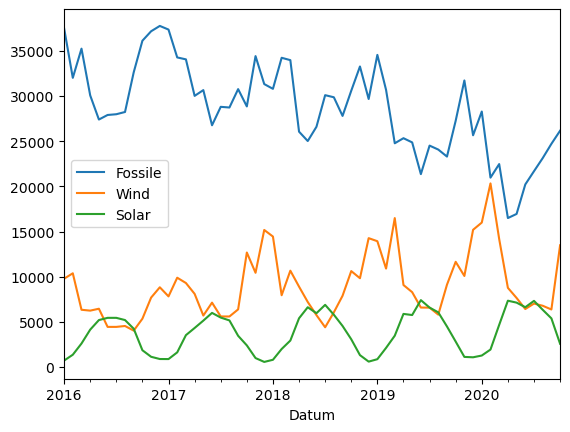

In [34]:
ene.plot();

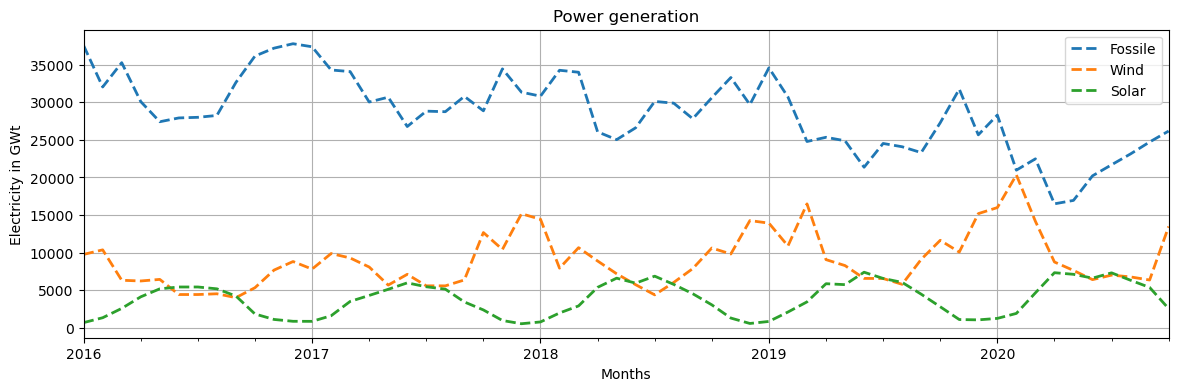

In [35]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
plt.xlabel('Months')
plt.ylabel('Electricity in GWt')
plt.title('Power generation')
plt.grid(True)

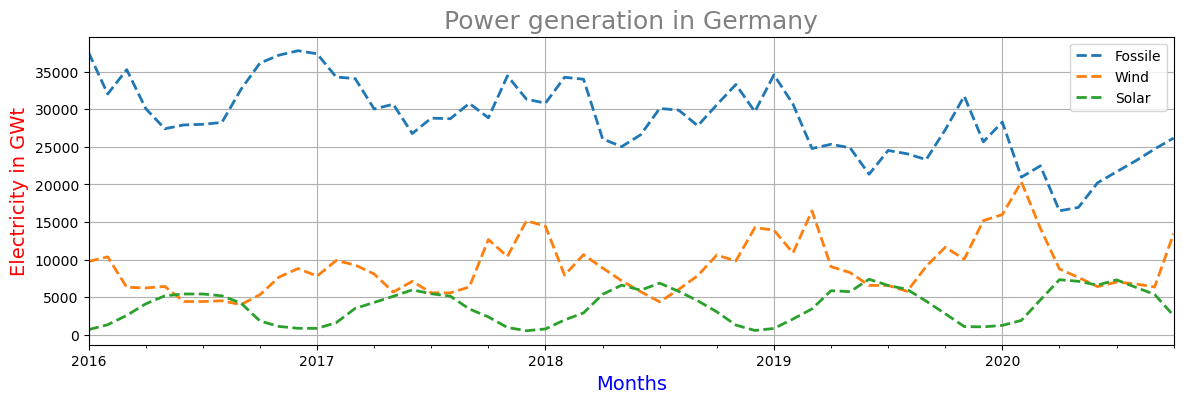

In [36]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
x = plt.xlabel('Months', fontsize=14, color='blue')
y = plt.ylabel('Electricity in GWt', fontsize=14, color='red')
t = plt.title('Power generation in Germany', fontsize=18, color='grey')
plt.grid(True)

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


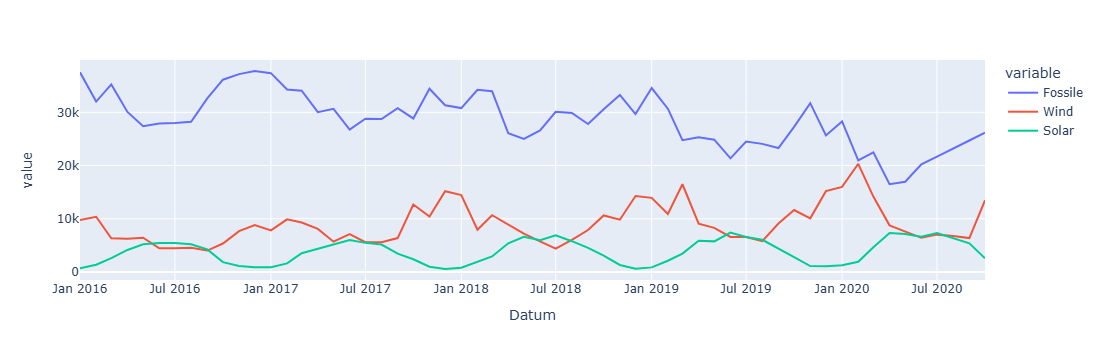

In [37]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'])

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



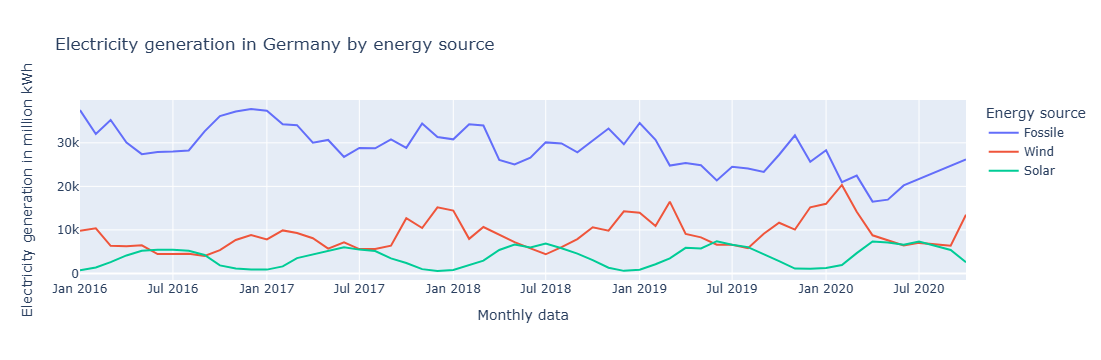

In [38]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Electricity generation in Germany by energy source', labels=dict(Datum="Monthly data", value="Electricity generation in million kWh", variable="Energy source"))

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



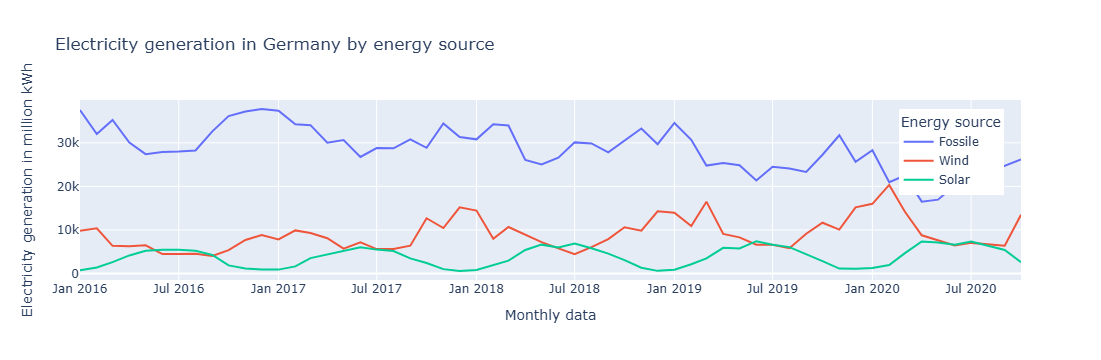

In [39]:
fig = px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Electricity generation in Germany by energy source', labels=dict(Datum="Monthly data", value="Electricity generation in million kWh", variable="Energy source"))
fig.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.87))
fig.show()

<div class="alert alert-info">
- Open a new notebook<br>
- Load the airline data (Attention - load packages first of course)<br>
- First plot the data with '.plot' and adapt the plot so that the reader understands it<br>
- Then plot the data with Plotly Express and adjust the plot accordingly<br>
- If you have extra time, check out the Plotly documentation online and try out another formatting option from it
</div>

<h2>1.4 Decompose Time Series Data</h2>

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

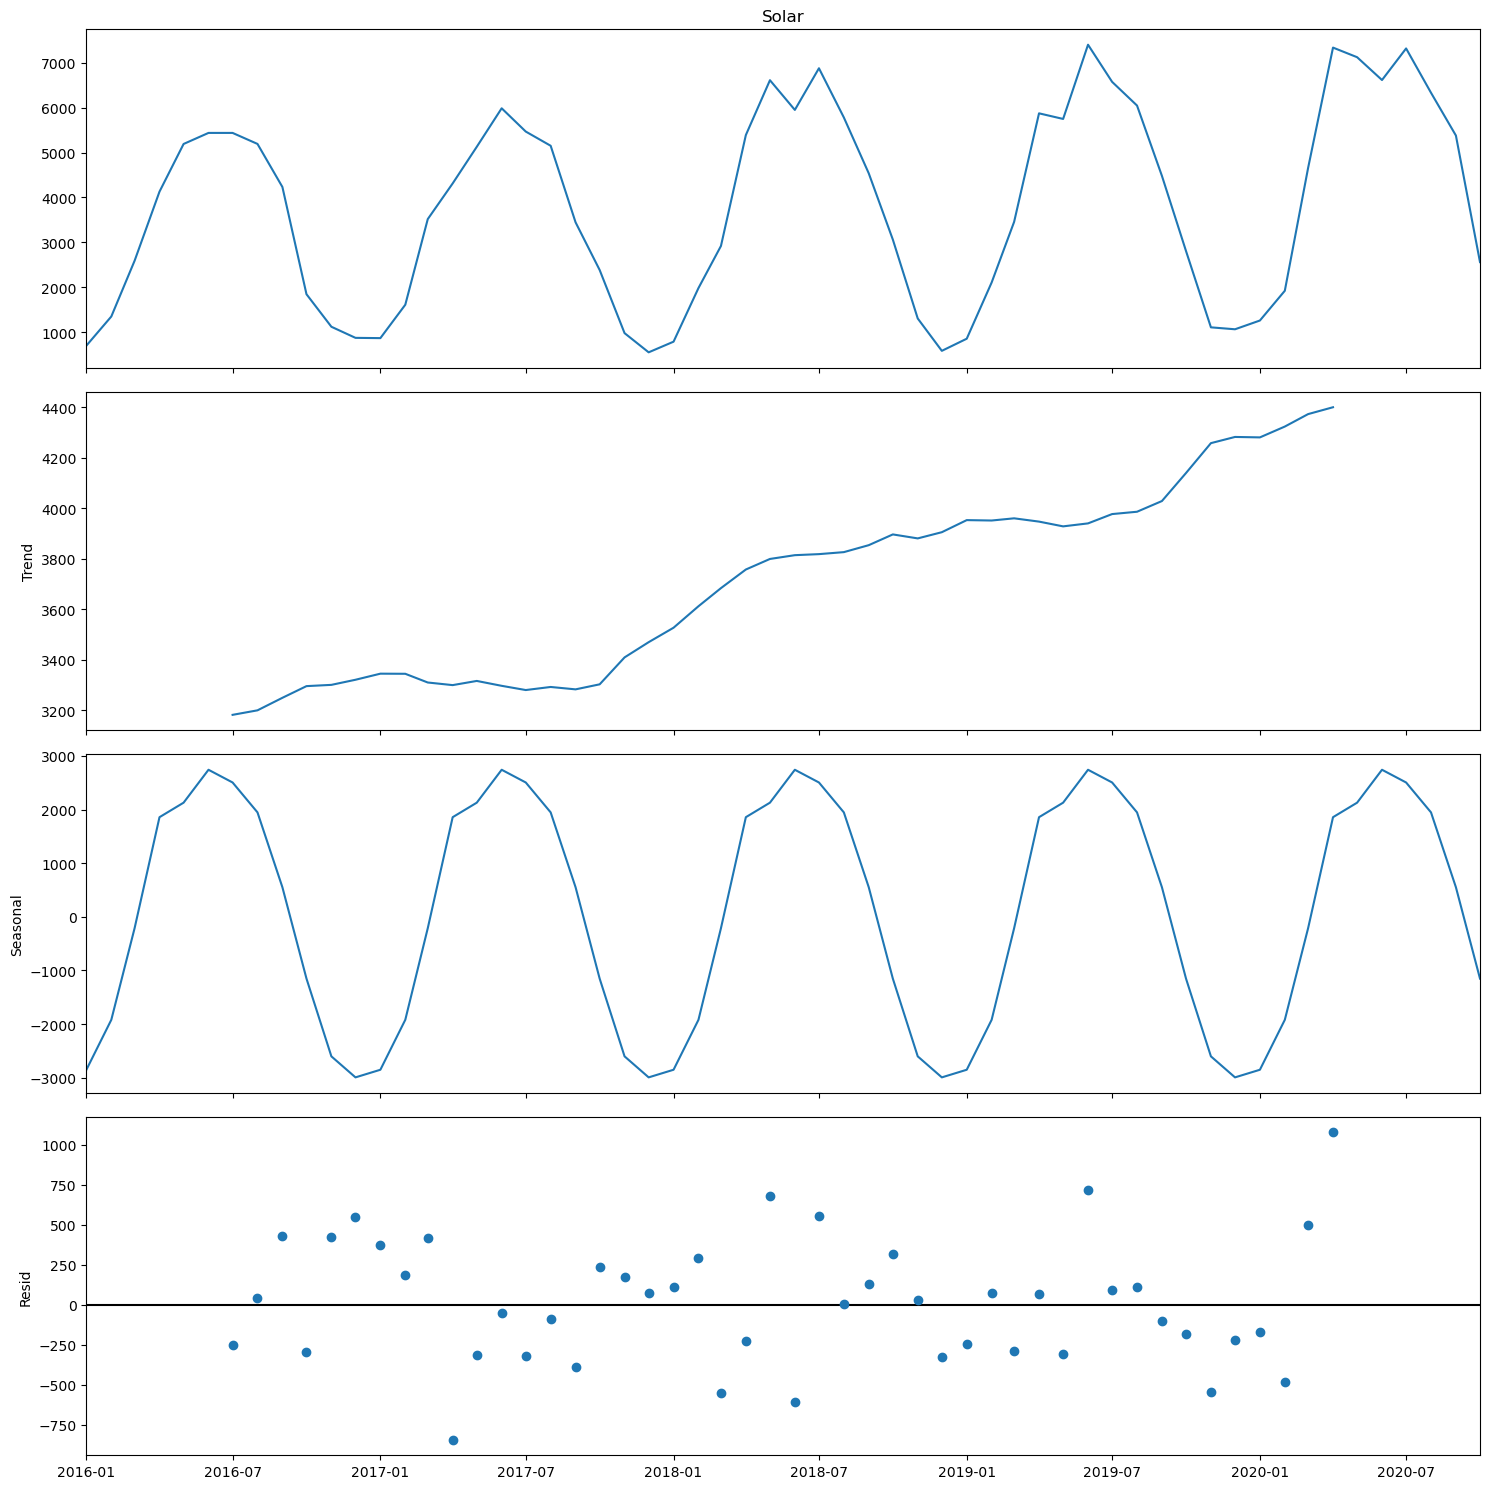

In [41]:
decomp = seasonal_decompose(ene['Solar'], model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()

<div class="alert alert-info">
- Decompose another time series.<br>
- What did you find?
</div>